# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.image import imread, imsave
from sklearn.cluster import KMeans


#### 2. Lee una imagen
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [2]:
foto = imread("foto_clase.PNG")


Muestra la imagen para ver que se ha cargado bien

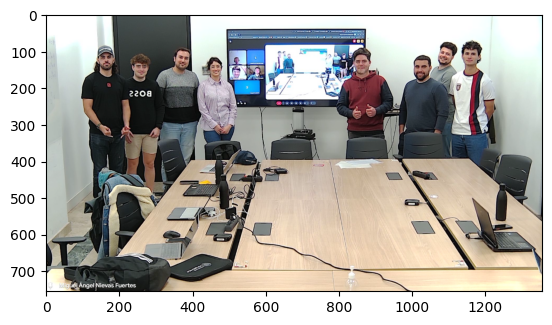

In [3]:
plt.imshow(foto)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [4]:
foto.shape

(755, 1356, 4)

In [5]:
foto_cortada =foto[:, :, :3] 

In [6]:
shape_org =foto_cortada.shape

In [7]:
foto_final = foto_cortada.reshape(-1,3)

In [8]:
foto_final.shape

(1023780, 3)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [9]:
km = KMeans(n_clusters=4,init='k-means++')
pred = km.fit_predict(foto_final)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizlos para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [10]:
datos_remodelado = km.cluster_centers_[km.labels_]

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [11]:
imagen_remodelada = datos_remodelado.reshape(shape_org)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

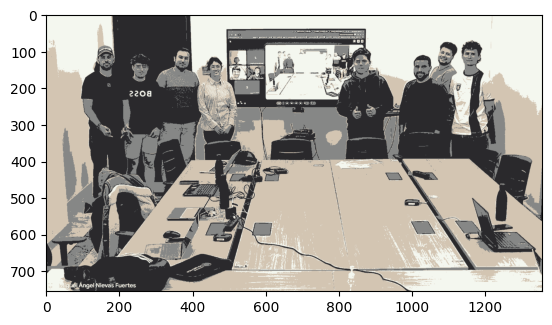

In [12]:
plt.imshow(imagen_remodelada)

In [34]:
plt.imsave('fotoboot.png',imagen_remodelada)

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [13]:
def cambiar_imagen(imagen, colores, uso='ver'):
    imagen = plt.imread(imagen)
    if imagen.shape[2] == 4:
        imagen = imagen[:, :, :3]

    shape_original = imagen.shape
    imagen_plana = imagen.reshape(-1, 3)

    km = KMeans(n_clusters=colores, init='k-means++', random_state=42)
    labels = km.fit_predict(imagen_plana)
    colores_cluster = km.cluster_centers_[labels]

    imagen_segmentada = colores_cluster.reshape(shape_original)

    if uso == 'ver':
        plt.imshow(imagen_segmentada)
    elif uso == 'guardar':
        plt.imsave('fotoboot.png', imagen_segmentada)


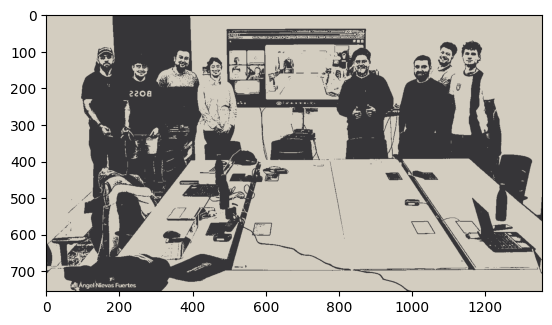

In [22]:
cambiar_imagen("foto_clase.PNG",2,"ver")

In [ ]:
''''

def cambiar_imagen (imagen,colores,uso):
    if uso == "ver":
        if imagen.shape[2] == 4:
            imagen_cortada = imagen[:, :, :3] 
            shape_util = imagen_cortada.shape
            imagen_final = imagen_cortada.reshape(-1,3)
            km = KMeans(n_clusters=colores,init='k-means++')
            km.fit_predict(imagen_final)
            datos_remodelado = km.cluster_centers_[km.labels_]
            imagen_remodelada = datos_remodelado.reshape(shape_util)
            plt.imshow(imagen_remodelada)
        elif imagen.shape[2] == 3:
            shape_util = imagen.shape
            imagen_final = imagen.reshape(-1,3)
            km = KMeans(n_clusters=colores,init='k-means++')
            km.fit_predict(imagen_final)
            datos_remodelado = km.cluster_centers_[km.labels_]
            imagen_remodelada = datos_remodelado.reshape(shape_util)
            plt.imshow(imagen_remodelada)
    elif uso =="guardar":
         if imagen.shape[2] == 4:
            imagen_cortada = imagen[:, :, :3] 
            shape_util = imagen_cortada.shape
            imagen_final = imagen_cortada.reshape(-1,3)
            km = KMeans(n_clusters=colores,init='k-means++')
            km.fit_predict(imagen_final)
            datos_remodelado = km.cluster_centers_[km.labels_]
            imagen_remodelada = datos_remodelado.reshape(shape_util)
            plt.imsave('fotoboot.png',imagen_remodelada)
        elif imagen.shape[2] == 3:
            shape_util = imagen.shape
            imagen_final = imagen.reshape(-1,3)
            km = KMeans(n_clusters=colores,init='k-means++')
            km.fit_predict(imagen_final)
            datos_remodelado = km.cluster_centers_[km.labels_]
            imagen_remodelada = datos_remodelado.reshape(shape_util)
            plt.imsave('fotoboot.png',imagen_remodelada)
'''